In [25]:
import pandas as pd
import os

CLINICAL_PATH = "../datasets/clinical_data"

 # Clinical data
 
These XML files contain clinical data for breast cancer (BRCA) patients from the TCGA project. Each file represents a single patient and includes:

- Patient information (age, death, vital status).
- Tumor characteristics (histology, stage).
- Treatment details and follow-up data.

### Load and explore clinical XML and TXT files:

In [26]:
def import_xml(file_path):
    df = pd.read_xml(file_path, parser="etree")
    if 'days_to_birth' in df.columns and 'age_at_initial_pathologic_diagnosis' in df.columns:
        print(f"File {file_path}: OK.")
        return 0
    else:
        print(f"File {file_path}: Not contains required columns.")
        return 1


def import_txt(file_path):
    df = pd.read_csv(file_path, sep="\t")
    #print(f"COLUMNS: {df.columns}")
    columns_to_select = df.columns[df.columns.str.contains('age|year|days|case|time', case=False)]
    print(f"COLUMNS with 'age|year|days|case': {columns_to_select}")

    if 'age_at_diagnosis' in df.columns:
        print(f"File {file_path}: Contains age_at_diagnosis column")
        #print(df['age_at_diagnosis'])


count_subfolders = 0
count_xml=0
count_txt=0
count_no=0
count_omf = 0
for subfolder in os.listdir(CLINICAL_PATH):
    count_subfolders += 1
    for file in os.listdir(f"{CLINICAL_PATH}/{subfolder}"):
        if file.endswith(".xml"):
            count_xml += 1
            count_omf += import_xml(f"{CLINICAL_PATH}/{subfolder}/{file}")
        elif file == "annotations.txt":
            a = 1
        elif file == "logs":
            for f in os.listdir(f"{CLINICAL_PATH}/{subfolder}/{file}"):
                if f.endswith(".txt"):
                    import_txt(f"{CLINICAL_PATH}/{subfolder}/{file}/{f}")
        elif file.endswith(".txt"):
            count_txt += 1
            #import_txt(f"{CLINICAL_PATH}/{subfolder}/{file}")
        else:
            # No xml file found in this folder {subfolder}
            count_no += 1

print("\n------------------------------------------------")
print(f"-> Number of xml files found: {count_xml}")
print(f"\t-> Number of 'omf' xml files found: {count_omf}")
print(f"-> Number of txt files found: {count_txt}")
print(f"-> Number of non-xml and non-txt files found: {count_no}")
print(f"-> Total subfolders: {count_subfolders}")
print("------------------------------------------------")

File ../datasets/clinical_data/00049989-fa21-48fb-8dda-710c0dd5932e/nationwidechildrens.org_clinical.TCGA-A2-A0CT.xml: OK.
File ../datasets/clinical_data/004b6bd4-19d0-4b40-99ef-1a76313fe7a5/nationwidechildrens.org_clinical.TCGA-GM-A2DD.xml: OK.
File ../datasets/clinical_data/00a5e81c-cd67-483f-9d99-3c733b2ead38/nationwidechildrens.org_clinical.TCGA-D8-A1JM.xml: OK.
File ../datasets/clinical_data/014f5ae1-5862-4165-9a3b-bba7bb08a527/nationwidechildrens.org_clinical.TCGA-C8-A12P.xml: OK.
File ../datasets/clinical_data/01a962ea-a87f-49fa-9a27-7273a39f64a9/nationwidechildrens.org_clinical.TCGA-S3-A6ZF.xml: OK.
File ../datasets/clinical_data/021d8f80-3db0-4f60-b404-a71e115102ca/nationwidechildrens.org_clinical.TCGA-BH-A18K.xml: OK.
File ../datasets/clinical_data/024bde93-ff69-4d1f-b301-c053e8c594f5/nationwidechildrens.org_omf.TCGA-A1-A0SP.xml: Not contains required columns.
File ../datasets/clinical_data/02726df0-5db3-4b3d-a3ca-8a1d8a0e130e/nationwidechildrens.org_clinical.TCGA-AN-A0FW.xml

Previous output:
```python
    ------------------------------------------------
    -> Number of xml files found: 818
        -> Number of 'omf' xml files found: 47
    -> Number of txt files found: 9
    -> Number of non-xml and non-txt files found: 0
    -> Total subfolders: 827
    ------------------------------------------------
```


**OMF files**
The OMF (Other Malignancy Form) files keep clinical information and do not contain laboratory or transcriptomic data, such as mRNA or RNA-Seq.

In [27]:
def import_txt(file_path):
    df = pd.read_csv(file_path, sep="\t")
    print(f"\nTXT file {file_path}. \nCOLUMNS: {df.columns}")
    columns_to_select = df.columns[df.columns.str.contains('age|year|days|case|time', case=False)]
    print(f"COLUMNS with 'age|year|days|case': {columns_to_select}")

import pickle
from intervaltree import Interval, IntervalTree
# pip install intervaltree

def import_parce(file_path):
    with open(file_path, "rb") as f:
        data = pickle.load(f)
    print(f"\nFile TXT PARCEL {file_path}: {data}")

for subfolder in os.listdir(CLINICAL_PATH):
    count_subfolders += 1
    for file in os.listdir(f"{CLINICAL_PATH}/{subfolder}"):
        if file == "logs":
            for f in os.listdir(f"{CLINICAL_PATH}/{subfolder}/{file}"):
                if f.endswith(".parcel"):
                    import_parce(f"{CLINICAL_PATH}/{subfolder}/{file}/{f}")
        elif file.endswith(".txt"):
            count_txt += 1
            import_txt(f"{CLINICAL_PATH}/{subfolder}/{file}")


TXT file ../datasets/clinical_data/051ca785-e7be-4ac3-8757-1c9ace8acf7e/annotations.txt. 
COLUMNS: Index(['id', 'submitter_id', 'entity_type', 'entity_id', 'category',
       'classification', 'created_datetime', 'status', 'notes'],
      dtype='object')
COLUMNS with 'age|year|days|case': Index(['created_datetime'], dtype='object')

File TXT PARCEL ../datasets/clinical_data/051ca785-e7be-4ac3-8757-1c9ace8acf7e/logs/nationwidechildrens.org_clinical.TCGA-A8-A08F.xml.parcel: IntervalTree([Interval(0, 84541, {'md5sum': 'f31cca8e42209358a8f3039ee72559bb'})])

TXT file ../datasets/clinical_data/07488c2c-c50f-402e-8f22-9278db6110f9/annotations.txt. 
COLUMNS: Index(['id', 'submitter_id', 'entity_type', 'entity_id', 'category',
       'classification', 'created_datetime', 'status', 'notes'],
      dtype='object')
COLUMNS with 'age|year|days|case': Index(['created_datetime'], dtype='object')

File TXT PARCEL ../datasets/clinical_data/07488c2c-c50f-402e-8f22-9278db6110f9/logs/nationwidechildrens

**Structures of files discarded for our analysis:**
- Annotations TXT files. 
    - COLUMNS: `Index(['id', 'submitter_id', 'entity_type', 'entity_id', 'category',
           'classification', 'created_datetime', 'status', 'notes'],
          dtype='object')`
    - COLUMNS with 'age|year|days|case': `Index(['id', 'submitter_id', 'entity_type', 'entity_id', 'category',
           'classification', 'created_datetime', 'status', 'notes'],
          dtype='object')`
- org_clinical_omf_v4 TXT files. 
    - COLUMNS: `Index(['bcr_patient_uuid', 'bcr_patient_barcode', 'bcr_omf_barcode',
           'bcr_omf_uuid', 'form_completion_date', 'malignancy_type',
           'other_malignancy_dx_days_to', 'surgery_indicator',
           'other_malignancy_surgery_type', 'other_malignancy_surgery_days_to',
           'pharmaceutical_therapy_indicator', 'pharmaceutical_therapy_extent',
           'pharmaceutical_therapy_drug_name', 'pharmaceutical_tx_started_days_to',
           'radiation_therapy_indicator', 'radiation_therapy_extent',
           'history_rt_tx_to_site_of_tcga_tumor',
           'radiation_therapy_started_days_to', 'ajcc_staging_edition',
           'ajcc_tumor_pathologic_pt', 'ajcc_nodes_pathologic_pn',
           'ajcc_metastasis_pathologic_pm', 'ajcc_pathologic_tumor_stage',
           'clinical_stage', 'other_malignancy_anatomic_site',
           'other_malignancy_anatomic_site_text',
           'other_malignancy_histological_type',
           'other_malignancy_histological_type_text',
           'other_malignancy_laterality', 'stage_other'],
          dtype='object')`
    - COLUMNS with 'age|year|days|case': `Index(['other_malignancy_dx_days_to', 'other_malignancy_surgery_days_to',
       'pharmaceutical_tx_started_days_to', 'radiation_therapy_started_days_to', 'ajcc_pathologic_tumor_stage',
       'clinical_stage', 'stage_other'],
      dtype='object')`
- org_clinical_omf_v4 TXT PARCEL files: `IntervalTree([Interval(0, 62088, {'md5sum': '1bad711cda0e80562749634e250e6fa1'})])`

### Check matching between 'days_to_birth' and 'age_at_initial_pathologic_diagnosis' columns:

In [28]:
flag = True

def check_age_days(file_path):
    temp_df = pd.read_xml(file_path, parser="etree")

    if 'days_to_birth' in temp_df.columns and 'age_at_initial_pathologic_diagnosis' in temp_df.columns:
        temp_df = temp_df[["days_to_birth", "age_at_initial_pathologic_diagnosis"]]
        temp_df = temp_df.dropna(how='all')

        rows_with_nan = temp_df[temp_df.isna().any(axis=1)]
        if rows_with_nan.empty:
            # Convert days_to_birth to years
            temp_df.loc[:, "days_to_birth"] = -(temp_df["days_to_birth"]) / 365
            temp_df["days_to_birth"] = temp_df["days_to_birth"].astype(int)

            if abs(temp_df.iloc[0]["days_to_birth"] - temp_df.iloc[0]["age_at_initial_pathologic_diagnosis"]) > 1:
                print(f"{temp_df.iloc[0]['days_to_birth']} != {temp_df.iloc[0]['age_at_initial_pathologic_diagnosis']}")
                flag = False
            else:
                print(f"{temp_df.iloc[0]['days_to_birth']} == {temp_df.iloc[0]['age_at_initial_pathologic_diagnosis']}")

for subfolder in os.listdir(CLINICAL_PATH):
    for file in os.listdir(f"{CLINICAL_PATH}/{subfolder}"):
        if file.endswith(".xml"):
            check_age_days(f"{CLINICAL_PATH}/{subfolder}/{file}")
            
if flag is False:
    print("\n-> Some age_at_initial_pathologic_diagnosis & days_to_birth mismatches found.")
else:
    print("\n-> All age_at_initial_pathologic_diagnosis & days_to_birth match.")

71.0 == 71.0
53.0 == 53.0
59.0 == 59.0
55.0 == 55.0
64.0 == 64.0
46.0 == 46.0
67.0 == 67.0
62.0 == 62.0
62.0 == 62.0
65.0 == 65.0
32.0 == 32.0
36.0 == 36.0
81.0 == 81.0
53.0 == 53.0
59.0 == 59.0
86.0 == 86.0
56.0 == 56.0
55.0 == 55.0
58.0 == 58.0
74.0 == 73.0
66.0 == 66.0
61.0 == 61.0
51.0 == 51.0
47.0 == 47.0
47.0 == 47.0
39.0 == 39.0
57.0 == 57.0
50.0 == 50.0
66.0 == 66.0
47.0 == 47.0
53.0 == 53.0
50.0 == 50.0
72.0 == 72.0
45.0 == 45.0
52.0 == 52.0
51.0 == 51.0
66.0 == 66.0
56.0 == 56.0
65.0 == 65.0
55.0 == 55.0
47.0 == 47.0
63.0 == 63.0
51.0 == 51.0
55.0 == 55.0
40.0 == 40.0
83.0 == 83.0
52.0 == 52.0
60.0 == 60.0
65.0 == 65.0
67.0 == 67.0
48.0 == 47.0
58.0 == 58.0
55.0 == 54.0
58.0 == 58.0
48.0 == 48.0
67.0 == 67.0
63.0 == 63.0
83.0 == 83.0
47.0 == 47.0
34.0 == 34.0
59.0 == 59.0
40.0 == 40.0
40.0 == 40.0
43.0 == 43.0
34.0 == 34.0
63.0 == 63.0
69.0 == 69.0
81.0 == 81.0
49.0 == 49.0
46.0 == 46.0
41.0 == 41.0
42.0 == 42.0
64.0 == 64.0
61.0 == 61.0
40.0 == 40.0
61.0 == 61.0
79.0 == 79.0

We can rely on 'age_at_initial_pathologic_diagnosis' only, as 'days_to_birth' and 'age_at_initial_pathologic_diagnosis' match in all files.

### Explore columns of clinical XML files

#### See an example of **org_clinical** XML file:

In [29]:
file_path = "../datasets/clinical_data/0a9561ad-0d8e-4776-be26-c9d7b2825045/nationwidechildrens.org_clinical.TCGA-B6-A0IG.xml"
temp_df = pd.read_xml(file_path, parser="etree")
pd.set_option('display.max_colwidth', None)
temp_df.describe()

,day_of_dcc_upload,month_of_dcc_upload,year_of_dcc_upload,program,dbgap_registration_code,additional_studies,tumor_tissue_site_other,days_to_birth,days_to_last_known_alive,days_to_death,...,her2_neu_breast_carcinoma_copy_analysis_input_total_number,breast_carcinoma_immunohistochemistry_progesterone_receptor_pos_finding_scale,breast_carcinoma_immunohistochemistry_pos_cell_score,postoperative_rx_tx,radiation_therapy,day_of_form_completion,month_of_form_completion,year_of_form_completion,drugs,radiations
count,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
mean,22.0,12.0,2016.0,NaN,NaN,NaN,NaN,-18433.0,NaN,4456.0,...,NaN,NaN,NaN,NaN,NaN,2.0,11.0,2010.0,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,22.0,12.0,2016.0,NaN,NaN,NaN,NaN,-18433.0,NaN,4456.0,...,NaN,NaN,NaN,NaN,NaN,2.0,11.0,2010.0,NaN,NaN
25%,22.0,12.0,2016.0,NaN,NaN,NaN,NaN,-18433.0,NaN,4456.0,...,NaN,NaN,NaN,NaN,NaN,2.0,11.0,2010.0,NaN,NaN
50%,22.0,12.0,2016.0,NaN,NaN,NaN,NaN,-18433.0,NaN,4456.0,...,NaN,NaN,NaN,NaN,NaN,2.0,11.0,2010.0,NaN,NaN
75%,22.0,12.0,2016.0,NaN,NaN,NaN,NaN,-18433.0,NaN,4456.0,...,NaN,NaN,NaN,NaN,NaN,2.0,11.0,2010.0,NaN,NaN
max,22.0,12.0,2016.0,NaN,NaN,NaN,NaN,-18433.0,NaN,4456.0,...,NaN,NaN,NaN,NaN,NaN,2.0,11.0,2010.0,NaN,NaN


In [30]:
file_path = "../datasets/clinical_data/ffb2e9d9-07dd-48dd-9c37-9f87c28b5b2c/nationwidechildrens.org_clinical.TCGA-E2-A1LK.xml"
temp_df = pd.read_xml(file_path, parser="etree")
columns_to_select = temp_df.columns[temp_df.columns.str.contains('age|year|days|case|time', case=False)]
print(f"COLUMNS of a xml file, with 'age|year|days|case':\n\t{columns_to_select}")

COLUMNS of a xml file, with 'age|year|days|case':
	Index(['year_of_dcc_upload', 'days_to_birth', 'days_to_last_known_alive',
       'days_to_death', 'days_to_last_followup',
       'days_to_initial_pathologic_diagnosis',
       'age_at_initial_pathologic_diagnosis',
       'year_of_initial_pathologic_diagnosis',
       'axillary_lymph_node_stage_method_type',
       'axillary_lymph_node_stage_other_method_descriptive_text',
       'er_level_cell_percentage_category', 'stage_event',
       'year_of_form_completion'],
      dtype='object')


#### See an example of org_omf XML file:

In [31]:
file_path = "../datasets/clinical_data/ff679dd3-62be-4332-8157-0a83ffb8516a/nationwidechildrens.org_omf.TCGA-AQ-A54O.xml"
temp_df = pd.read_xml(file_path, parser="etree")
print(f"COLUMNS of an 'omf' xml file:\n\t{temp_df.columns}")

COLUMNS of an 'omf' xml file:
	Index(['bcr', 'file_uuid', 'batch_number', 'project_code', 'disease_code',
       'day_of_dcc_upload', 'month_of_dcc_upload', 'year_of_dcc_upload',
       'patient_withdrawal', 'program', 'dbgap_registration_code',
       'additional_studies', 'tissue_source_site', 'patient_id',
       'bcr_patient_barcode', 'bcr_patient_uuid', 'omfs'],
      dtype='object')


# info su lab e ospedale

In [32]:
import xml.etree.ElementTree as ET
file_path = "../datasets/clinical_data/0a9561ad-0d8e-4776-be26-c9d7b2825045/nationwidechildrens.org_clinical.TCGA-B6-A0IG.xml"
tree = ET.parse(file_path)
root = tree.getroot()
print(root.tag)  # ti dice il namespace predefinito
for elem in root.iter():
    print(elem.tag)

{http://tcga.nci/bcr/xml/clinical/brca/2.7}tcga_bcr
{http://tcga.nci/bcr/xml/clinical/brca/2.7}tcga_bcr
{http://tcga.nci/bcr/xml/administration/2.7}admin
{http://tcga.nci/bcr/xml/administration/2.7}bcr
{http://tcga.nci/bcr/xml/administration/2.7}file_uuid
{http://tcga.nci/bcr/xml/administration/2.7}batch_number
{http://tcga.nci/bcr/xml/administration/2.7}project_code
{http://tcga.nci/bcr/xml/administration/2.7}disease_code
{http://tcga.nci/bcr/xml/administration/2.7}day_of_dcc_upload
{http://tcga.nci/bcr/xml/administration/2.7}month_of_dcc_upload
{http://tcga.nci/bcr/xml/administration/2.7}year_of_dcc_upload
{http://tcga.nci/bcr/xml/administration/2.7}patient_withdrawal
{http://tcga.nci/bcr/xml/administration/2.7}withdrawn
{http://tcga.nci/bcr/xml/administration/2.7}program
{http://tcga.nci/bcr/xml/administration/2.7}dbgap_registration_code
{http://tcga.nci/bcr/xml/clinical/brca/2.7}patient
{http://tcga.nci/bcr/xml/administration/2.7}additional_studies
{http://tcga.nci/bcr/xml/clinical

In [33]:
import xml.etree.ElementTree as ET

def import_xml(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
            
    ns = {
        'admin': 'http://tcga.nci/bcr/xml/administration/2.7',
        'shared': 'http://tcga.nci/bcr/xml/shared/2.7',
        'clin_shared': 'http://tcga.nci/bcr/xml/clinical/shared/2.7',
        'stage': 'http://tcga.nci/bcr/xml/clinical/shared/stage/2.7'
    }
            
    tss = root.find('.//shared:tissue_source_site', ns).text
    bcr = root.find('.//admin:bcr', ns).text
    
    birth_elem = root.find('.//clin_shared:days_to_birth', ns)
    days_to_birth = int(birth_elem.text) if (birth_elem is not None and birth_elem.text) else None
    death_elem = root.find('.//clin_shared:days_to_death', ns)
    days_to_death = int(death_elem.text) if (death_elem is not None and death_elem.text) else None
    
    vital_status = root.find('.//clin_shared:vital_status', ns).text
    patient_barcode = root.find('.//shared:bcr_patient_barcode', ns).text    
    
    pathologic_stage_elem = root.find('.//stage:pathologic_stage', ns)
    pathologic_stage = pathologic_stage_elem.text if (pathologic_stage_elem is not None and pathologic_stage_elem.text) else None
        
    records.append({'file': file_path, 'tissue_source_site': tss, 'bcr': bcr, 'days_to_birth': days_to_birth, 'days_to_death': days_to_death, 'vital_status': vital_status, 'patient_barcode': patient_barcode, 'pathologic_stage': pathologic_stage})

records = []

for subfolder in os.listdir(f"{CLINICAL_PATH}"):
        file_xml_or_annotation_or_orm = 0
        for file in os.listdir(f"{CLINICAL_PATH}/{subfolder}"):
            if file.endswith(".xml") and "annotations" not in file and "org_omf" not in file:
                selected_data = import_xml(f"{CLINICAL_PATH}/{subfolder}/{file}")                

df = pd.DataFrame(records)
df = df.dropna(how='all')

print(df.head())

                                                                                                               file  \
0  ../datasets/clinical_data/00049989-fa21-48fb-8dda-710c0dd5932e/nationwidechildrens.org_clinical.TCGA-A2-A0CT.xml   
1  ../datasets/clinical_data/004b6bd4-19d0-4b40-99ef-1a76313fe7a5/nationwidechildrens.org_clinical.TCGA-GM-A2DD.xml   
2  ../datasets/clinical_data/00a5e81c-cd67-483f-9d99-3c733b2ead38/nationwidechildrens.org_clinical.TCGA-D8-A1JM.xml   
3  ../datasets/clinical_data/014f5ae1-5862-4165-9a3b-bba7bb08a527/nationwidechildrens.org_clinical.TCGA-C8-A12P.xml   
4  ../datasets/clinical_data/01a962ea-a87f-49fa-9a27-7273a39f64a9/nationwidechildrens.org_clinical.TCGA-S3-A6ZF.xml   

  tissue_source_site                             bcr  days_to_birth  \
0                 A2  Nationwide Children's Hospital       -25959.0   
1                 GM  Nationwide Children's Hospital       -19415.0   
2                 D8  Nationwide Children's Hospital       -21602.0   
3

In [34]:
df.isnull().sum()

file                    0
tissue_source_site      0
bcr                     0
days_to_birth          10
days_to_death         696
vital_status            0
patient_barcode         0
pathologic_stage        8
dtype: int64

Ci sono dei valori di birth non Avalable (NaN)

In [35]:
df = df.dropna(subset=['days_to_birth'])

In [36]:
df[['tissue_source_site']].value_counts()

tissue_source_site
BH                    117
A2                     75
E2                     73
A8                     70
D8                     56
AR                     46
B6                     40
AN                     38
E9                     36
AO                     32
C8                     31
EW                     26
A7                     25
OL                     16
AC                     14
LL                     13
GM                     13
A1                     10
S3                      9
AQ                      8
3C                      3
PL                      3
GI                      2
LD                      2
UL                      1
UU                      1
V7                      1
Name: count, dtype: int64

[gdc.cancer.gov - tissue source site codes](https://gdc.cancer.gov/resources-tcga-users/tcga-code-tables/tissue-source-site-codes)

Our tissue source sites:

| TSS Code | Source Site                  | Study Name                | BCR |
|----------|------------------------------|---------------------------|-----|
| BH       | University of Pittsburgh     | Breast invasive carcinoma | NCH |
| A2       | Walter Reed                  | Breast invasive carcinoma | NCH |
| E2       | Roswell Park                 | Breast invasive carcinoma | NCH |
| A8       | Indivumed                    | Breast invasive carcinoma | NCH |
| D8       | Greater Poland Cancer Center | Breast invasive carcinoma | NCH |
| AR       | Mayo                         | Breast invasive carcinoma | NCH |
| B6       | Duke                         | Breast invasive carcinoma | NCH |
| AN       | Cureline                     | Breast invasive carcinoma | NCH |
| E9       | Asterand                     | Breast invasive carcinoma | NCH |
| AO       | MSKCC                        | Breast invasive carcinoma | NCH |

In [37]:
df[['bcr']].value_counts()

bcr                           
Nationwide Children's Hospital    761
Name: count, dtype: int64

In [38]:
df[df['tissue_source_site'] == 'A0']

,file,tissue_source_site,bcr,days_to_birth,days_to_death,vital_status,patient_barcode,pathologic_stage


In [39]:
df[(df['vital_status'] == 'Dead') & (df['days_to_death'].isna())]

,file,tissue_source_site,bcr,days_to_birth,days_to_death,vital_status,patient_barcode,pathologic_stage


Tutti i morti hanno un valore di days_to_death.

# Plot vivi/morti

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

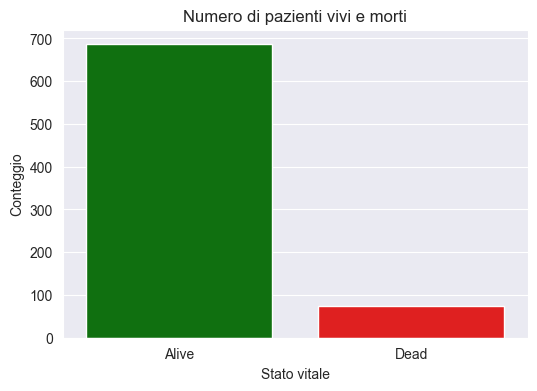

In [41]:
status_counts = df['vital_status'].value_counts().reset_index()
status_counts.columns = ['vital_status', 'count']

plt.figure(figsize=(6,4))
sns.barplot(data=status_counts, x='vital_status', y='count', hue='vital_status', palette={'Alive':'green','Dead':'red'}, dodge=False)
plt.title('Numero di pazienti vivi e morti')
plt.ylabel('Conteggio')
plt.xlabel('Stato vitale')
plt.show()

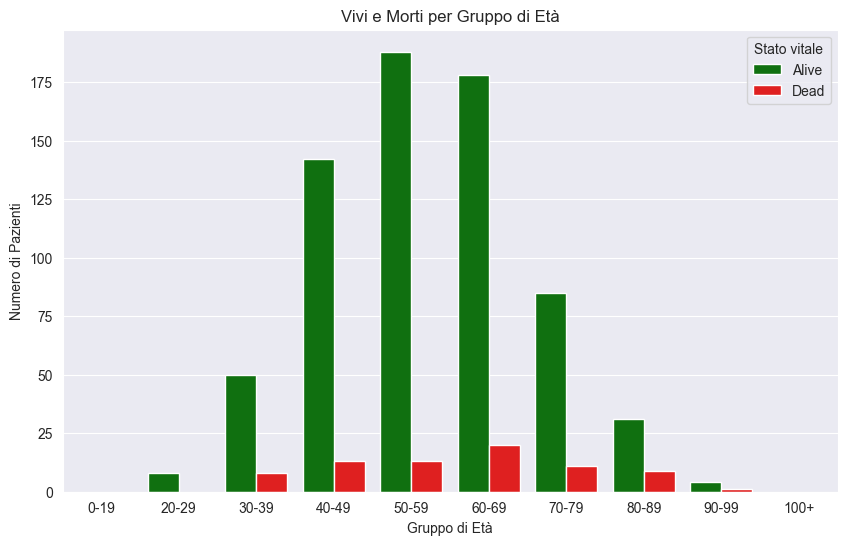

In [42]:
# Calcolo età in anni (i valori sono negativi)
df['age'] = (-df['days_to_birth'] / 365).astype(int)

# Creiamo gruppi di età (decadi)
bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, 99, 120]
labels = ['0-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99','100+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# Conteggio per età e vital_status
age_status_counts = df.groupby(['age_group', 'vital_status'], observed=True).size().reset_index(name='count')

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=age_status_counts, x='age_group', y='count', hue='vital_status', palette=['green','red'])
plt.title('Vivi e Morti per Gruppo di Età')
plt.xlabel('Gruppo di Età')
plt.ylabel('Numero di Pazienti')
plt.legend(title='Stato vitale')
plt.show()

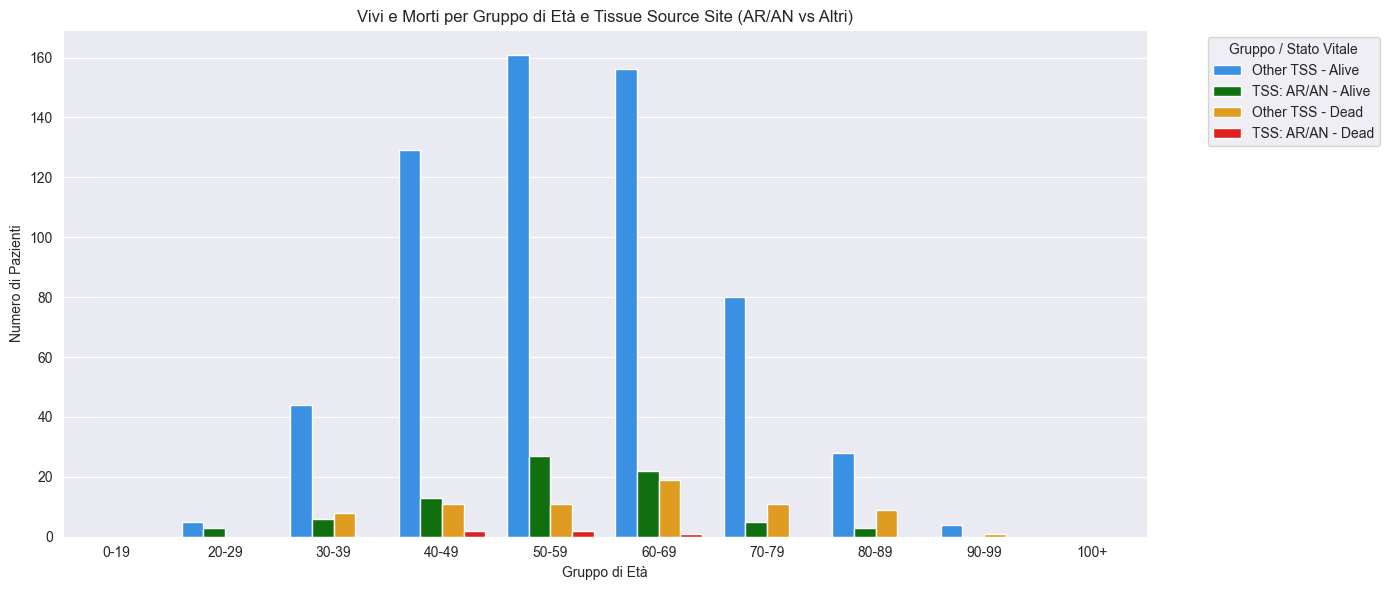

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['age'] = (-df['days_to_birth'].astype(float) / 365).astype(int)

bins = [0,19,29,39,49,59,69,79,89,99,120]
labels = ['0-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99','100+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)
df['tss_group'] = df['tissue_source_site'].apply(lambda x: 'TSS: AR/AN' if x in ['AR','AN'] else 'Other TSS')

age_status_counts = df.groupby(['age_group','tss_group','vital_status'], observed=True).size().reset_index(name='count')

# Creiamo una colonna combinata per hue
age_status_counts['category'] = age_status_counts['tss_group'] + ' - ' + age_status_counts['vital_status']

# Definiamo la palette piatta usando la nuova colonna
color_map = {
    'TSS: AR/AN - Alive': 'green',
    'TSS: AR/AN - Dead': 'red',
    'Other TSS - Alive': 'dodgerblue',
    'Other TSS - Dead': 'orange'
}

plt.figure(figsize=(14,6))
sns.barplot(
    data=age_status_counts,
    x='age_group',
    y='count',
    hue='category',
    palette=color_map
)

plt.title('Vivi e Morti per Gruppo di Età e Tissue Source Site (AR/AN vs Altri)')
plt.xlabel('Gruppo di Età')
plt.ylabel('Numero di Pazienti')
plt.legend(title='Gruppo / Stato Vitale', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


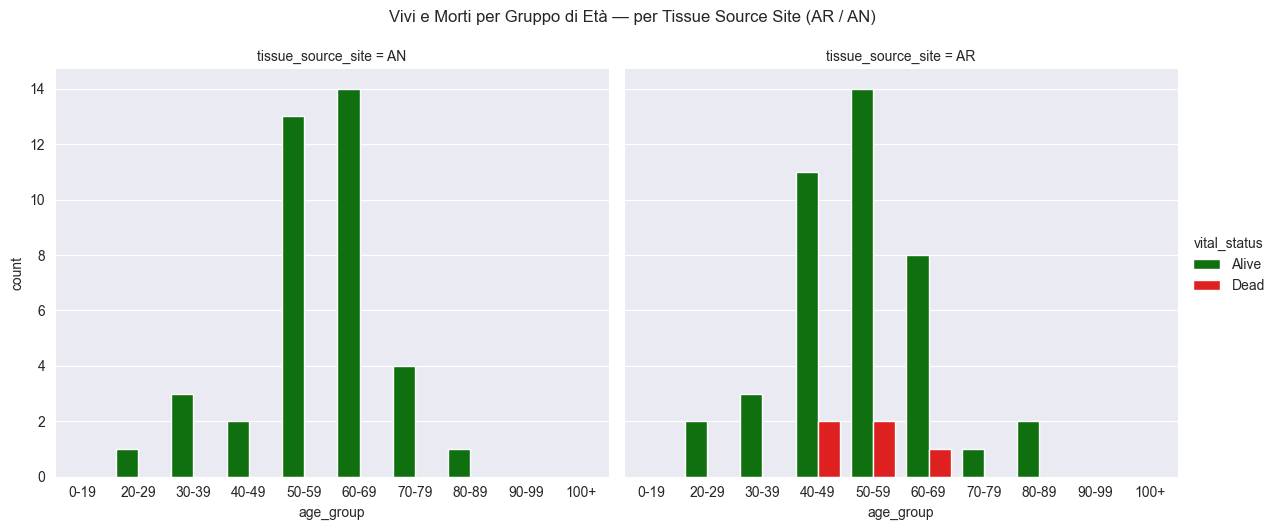

In [44]:
# Calcolo età in anni (valori negativi -> età positiva)
df['age'] = (-df['days_to_birth'].astype(float) / 365).astype(int)

# Gruppi di età
bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, 99, 120]
labels = ['0-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99','100+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# ✅ Filtriamo solo i pazienti da AR o AN
df_filtered = df[df['tissue_source_site'].isin(['AR', 'AN'])]

# Conteggio per gruppo d’età, stato vitale e sito
age_status_counts = (
    df_filtered
    .groupby(['age_group', 'vital_status', 'tissue_source_site'], observed=True)
    .size()
    .reset_index(name='count')
)

g = sns.catplot(
    data=age_status_counts,
    x='age_group',
    y='count',
    hue='vital_status',
    col='tissue_source_site',
    kind='bar',
    palette=['green', 'red'],
    height=5,
    aspect=1.2
)

g.fig.suptitle('Vivi e Morti per Gruppo di Età — per Tissue Source Site (AR / AN)', y=1.05)
plt.show()

### Check: paziente è ripetuto?

In [45]:
df[df['patient_barcode'].duplicated(keep=False)]

,file,tissue_source_site,bcr,days_to_birth,days_to_death,vital_status,patient_barcode,pathologic_stage,age,age_group,tss_group


Vediamo che non abbiamo più file clinici per lo stesso patiente_barcode, quindi ogni paziente è rappresentato una sola volta.

### Plot stage vs age

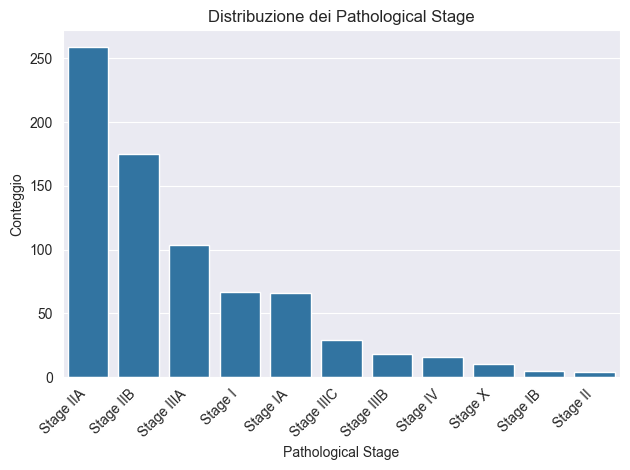

In [46]:
sns.countplot(
    x='pathologic_stage', 
    data=df, 
    order=df['pathologic_stage'].value_counts().index
)
plt.title("Distribuzione dei Pathological Stage")
plt.xlabel("Pathological Stage")
plt.ylabel("Conteggio")
plt.xticks(rotation=45, ha='right')  # ruota e allinea a destra
plt.tight_layout()  # evita tagli del titolo o label
plt.show()
